In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
import time

random.seed(100)

In [4]:
### Data Preprocessing ###

dataset = pd.read_csv('Numeric_case3data.csv')

In [5]:
### EDA ###

dataset.head()



,studentID,grade,year,dropped,zip,ethnicity,sex,gpa,subsidizedLunches,employmentHours,hrsWifiPerWeek,sanctions,librarySwipesPerWeek,apClasses,athleticSeasons
0,12006,12,2012,0,15232,5,2,1.89,0,0,4,1,1,1,0
1,12008,12,2012,0,15206,5,2,2.21,1,0,10,2,3,0,0
2,12009,12,2012,0,15206,5,2,2.72,0,0,8,2,6,0,0
3,12010,12,2012,1,15206,5,2,1.67,0,0,4,2,6,2,0
4,12014,12,2012,0,15201,5,2,2.00,2,0,8,2,5,0,0


In [6]:
dataset.columns


Index(['studentID', 'grade', 'year', 'dropped', 'zip', 'ethnicity', 'sex',
       'gpa', 'subsidizedLunches', 'employmentHours', 'hrsWifiPerWeek',
       'sanctions', 'librarySwipesPerWeek', 'apClasses', 'athleticSeasons'],
      dtype='object')

In [7]:
dataset.describe()

,studentID,grade,year,dropped,zip,ethnicity,sex,gpa,subsidizedLunches,employmentHours,hrsWifiPerWeek,sanctions,librarySwipesPerWeek,apClasses,athleticSeasons
count,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.0,17885.0,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000,17885.000000
mean,16584.575287,10.392899,2014.561644,0.058597,15212.126587,5.0,2.0,3.021393,0.844507,2.617557,7.460889,1.852502,5.119653,0.528935,1.068325
std,2010.415809,1.105134,1.703623,0.234875,11.018791,0.0,0.0,0.719775,0.916699,4.945092,4.134724,0.490282,3.349923,0.949116,0.814571
min,12006.000000,9.000000,2012.000000,0.000000,15201.000000,5.0,2.0,0.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,15162.000000,9.000000,2013.000000,0.000000,15206.000000,5.0,2.0,2.520000,0.000000,0.000000,4.000000,2.000000,3.000000,0.000000,0.000000
50%,16576.000000,10.000000,2015.000000,0.000000,15206.000000,5.0,2.0,3.090000,0.000000,0.000000,7.000000,2.000000,4.000000,0.000000,1.000000
75%,18126.000000,11.000000,2016.000000,0.000000,15224.000000,5.0,2.0,3.560000,2.000000,5.000000,10.000000,2.000000,7.000000,1.000000,2.000000
max,20828.000000,12.000000,2017.000000,1.000000,15232.000000,5.0,2.0,5.010000,2.000000,20.000000,22.000000,3.000000,29.000000,7.000000,5.000000


In [8]:
## Cleaning Data

# Removing NaN
dataset.isna().any() # No NAs

studentID               False
grade                   False
year                    False
dropped                 False
zip                     False
ethnicity               False
sex                     False
gpa                     False
subsidizedLunches       False
employmentHours         False
hrsWifiPerWeek          False
sanctions               False
librarySwipesPerWeek    False
apClasses               False
athleticSeasons         False
dtype: bool

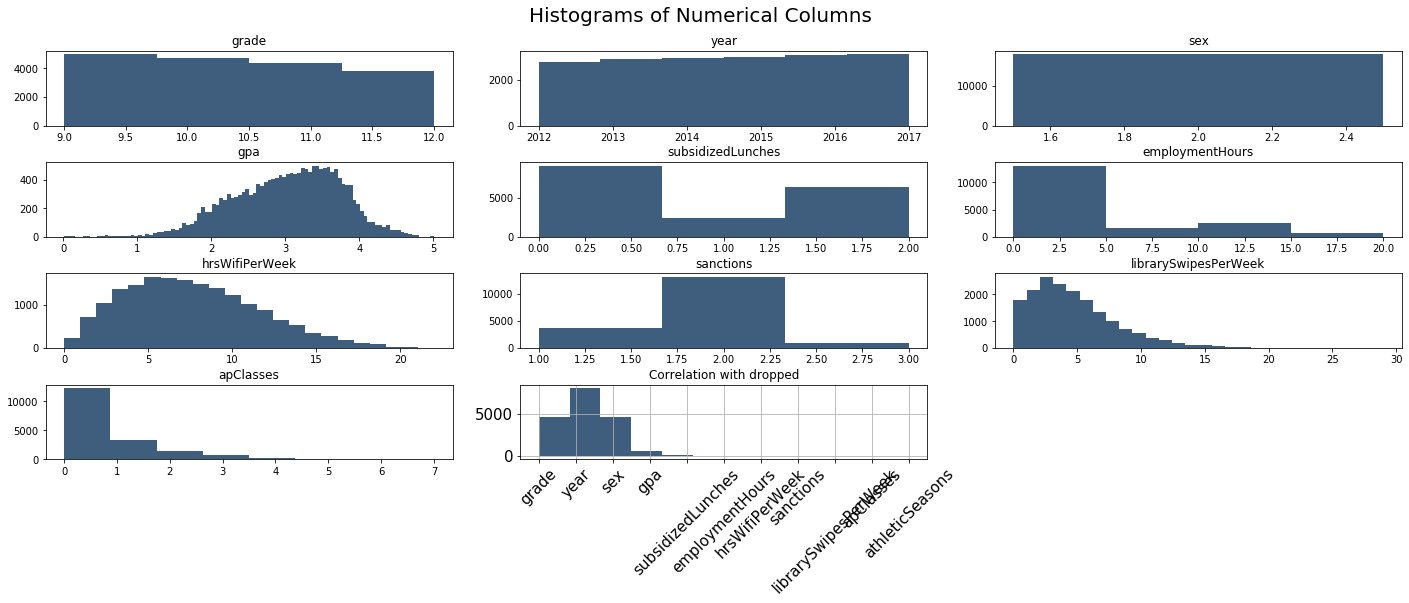

In [10]:
## Histograms

dataset2 = dataset.drop(columns = ['studentID', 'ethnicity','zip', 'dropped'])

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


## Correlation with Response Variable (Note: Models like RF are not linear like these)

dataset2.corrwith(dataset.dropped).plot.bar(
        figsize = (20, 10), title = "Correlation with dropped", fontsize = 15,
        rot = 45, grid = True)

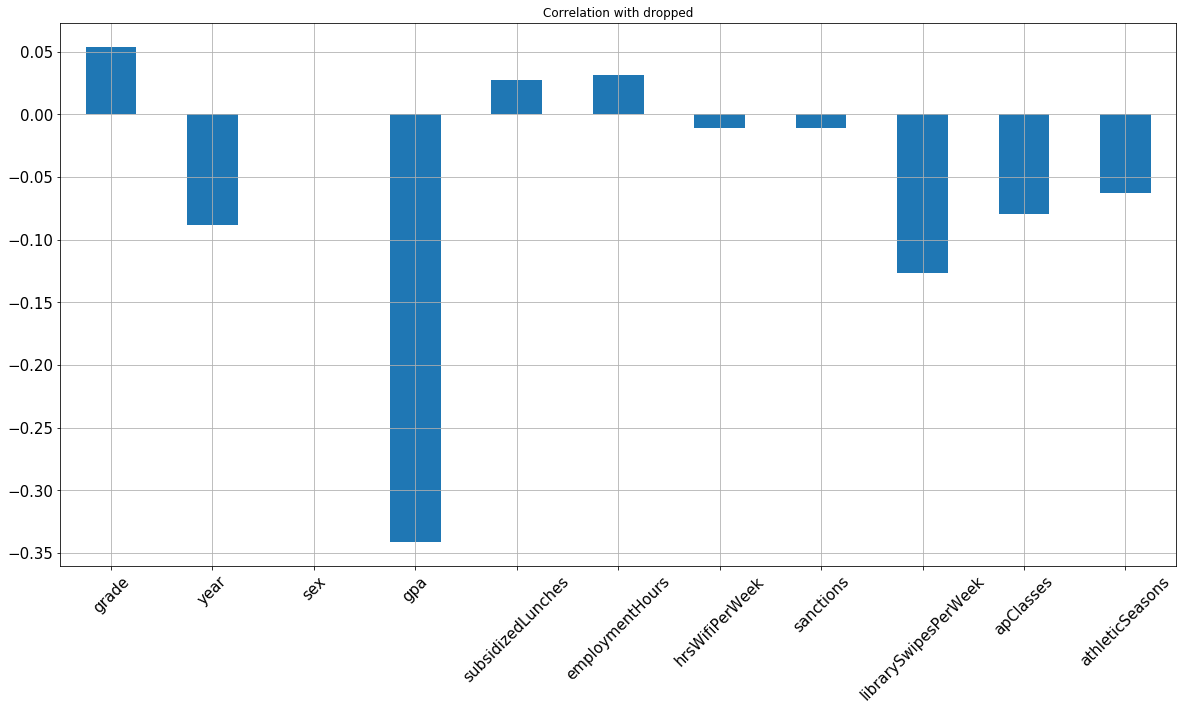

In [11]:
## Correlation with Response Variable (Note: Models like RF are not linear like these)

dataset2.corrwith(dataset.dropped).plot.bar(
        figsize = (20, 10), title = "Correlation with dropped", fontsize = 15,
        rot = 45, grid = True)

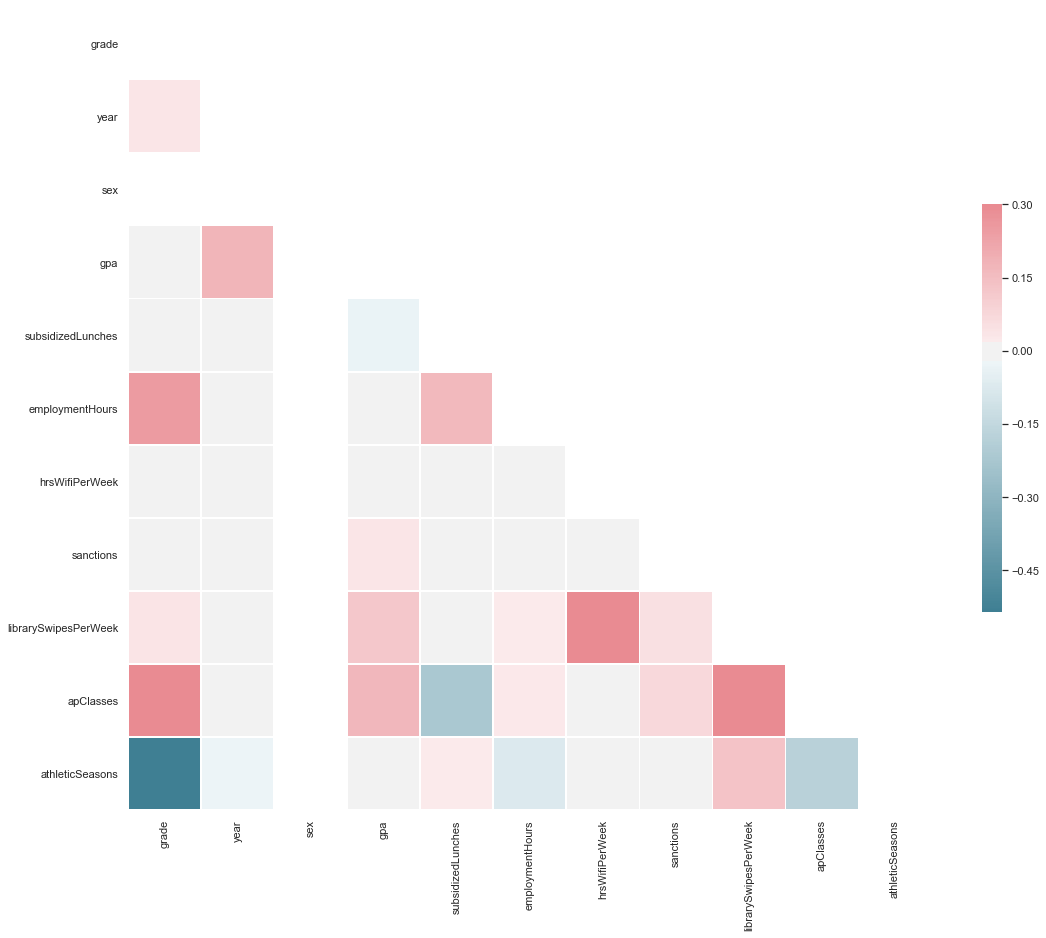

In [12]:
## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


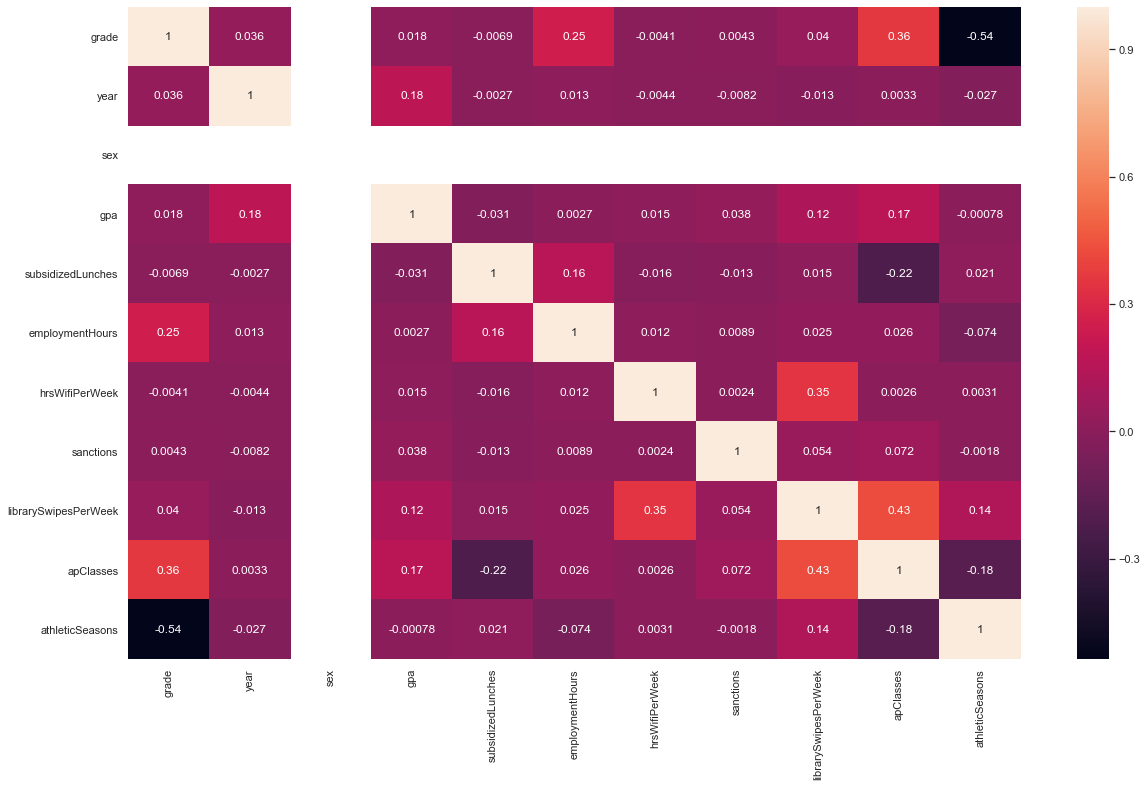

In [13]:
plt.figure(figsize=(20,12))

sn.heatmap(corr,annot=True,Cmap='coolwarm')

In [ ]:
# Feature Engineering

#dataset = dataset.drop(columns = ['months_employed'])
#dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12))


In [ ]:
#dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()


In [14]:
dataset.isna().any()

studentID               False
grade                   False
year                    False
dropped                 False
zip                     False
ethnicity               False
sex                     False
gpa                     False
subsidizedLunches       False
employmentHours         False
hrsWifiPerWeek          False
sanctions               False
librarySwipesPerWeek    False
apClasses               False
athleticSeasons         False
dtype: bool

In [ ]:
#dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

In [15]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)
dataset.columns


Index(['studentID', 'grade', 'year', 'dropped', 'zip', 'ethnicity', 'sex',
       'gpa', 'subsidizedLunches', 'employmentHours', 'hrsWifiPerWeek',
       'sanctions', 'librarySwipesPerWeek', 'apClasses', 'athleticSeasons'],
      dtype='object')

In [16]:
#dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

In [17]:
# Removing extra columns
response = dataset["dropped"]
users = dataset['studentID']
dataset = dataset.drop(columns = ["dropped", "studentID",'ethnicity','zip',])

In [18]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [19]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [20]:
#### Model Building ####

### Comparing Models

## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [23]:
results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [24]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.952195,0.828125,0.248826,0.382671


In [56]:
## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Test Data Accuracy: 0.9405


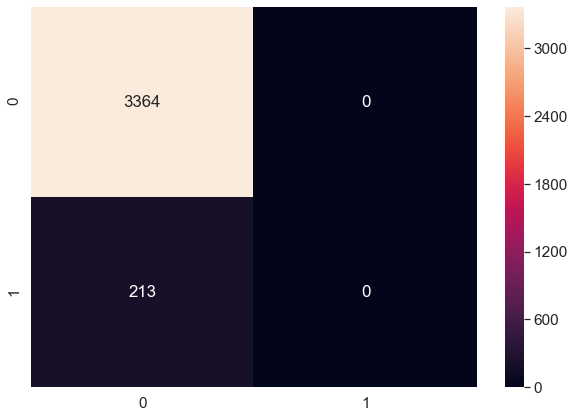

In [57]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [54]:
## SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test Data Accuracy: 0.9572


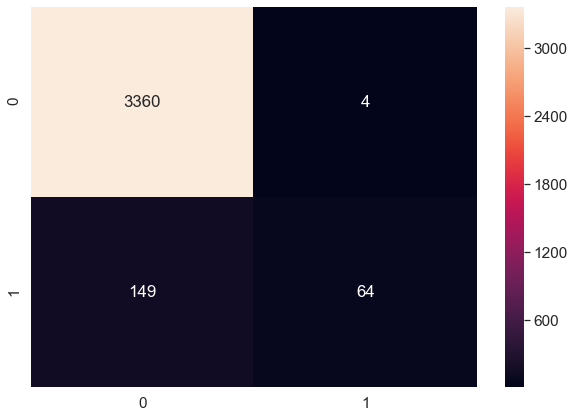

In [55]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [27]:
## RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


In [28]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.952195,0.828125,0.248826,0.382671
1,SVM (Linear),0.940453,0.000000,0.000000,0.000000
2,SVM (RBF),0.957227,0.941176,0.300469,0.455516
3,Random Forest (n=100),0.969248,0.845638,0.591549,0.696133


In [29]:
## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.97 (+/- 0.00)


In [30]:
print(classifier.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [31]:
## Parameter Tuning
# pip install joblib
# conda install joblib

# Applying Grid Search

# Round 1: Entropy
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}


In [32]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [33]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 275.79 seconds


In [34]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.9665222253284875,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [37]:
# Round 2: Entropy
parameters = {"max_depth": [None],
              "max_features": [9, 10, 11],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))


Took 104.37 seconds


In [38]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.9665921162985742,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 9,
  'min_samples_leaf': 1,
  'min_samples_split': 12})

In [39]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [40]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.952195,0.828125,0.248826,0.382671
1,SVM (Linear),0.940453,0.000000,0.000000,0.000000
2,SVM (RBF),0.957227,0.941176,0.300469,0.455516
3,Random Forest (n=100),0.969248,0.845638,0.591549,0.696133
4,"Random Forest (n=100, GSx2 + Entropy)",0.966732,0.764045,0.638498,0.695652


In [41]:

# Round 1: Gini
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 273.22 seconds


In [42]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


(0.9665222253284875,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [43]:
# Round 2: Gini
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 77.16 seconds


In [44]:
grid_search

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='

In [45]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.9672211350293543,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 10})

In [46]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [47]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.952195,0.828125,0.248826,0.382671
1,SVM (Linear),0.940453,0.000000,0.000000,0.000000
2,SVM (RBF),0.957227,0.941176,0.300469,0.455516
3,Random Forest (n=100),0.969248,0.845638,0.591549,0.696133
4,"Random Forest (n=100, GSx2 + Entropy)",0.966732,0.764045,0.638498,0.695652
5,"Random Forest (n=100, GSx2 + Gini)",0.969528,0.825000,0.619718,0.707775


Test Data Accuracy: 0.9695


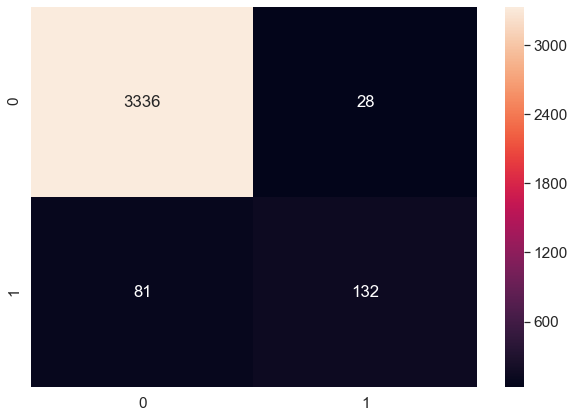

In [48]:
## EXTRA: Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


In [49]:

#### End of Model ####


# Formatting Final Results

final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['studentID', 'dropped', 'predictions']]

In [50]:
final_results

,studentID,dropped,predictions
8,12018,0.0,0
9,12019,0.0,0
12,12022,0.0,1
16,12028,0.0,0
18,12032,1.0,0
31,12052,0.0,0
33,12055,1.0,0
37,12059,0.0,0
44,12066,0.0,0
45,12067,0.0,0


In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score(y_test, y_pred)

0.805697442682253

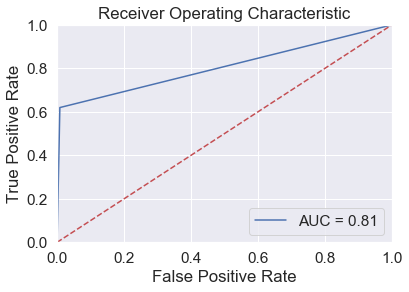

In [53]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
